# 初始化



## 系统环境初始化

Cuda版本

In [1]:
import torch
print(torch.version.cuda)

!nvcc --version

11.8
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


安装libSSL 1.1

In [2]:
!wget http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

--2023-08-14 04:44:10--  http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
Resolving nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)... 185.125.190.39, 91.189.91.81, 91.189.91.83, ...
Connecting to nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)|185.125.190.39|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321244 (1.3M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  1.98MB/s    in 0.6s    

2023-08-14 04:44:11 (1.98 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’ saved [1321244/1321244]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 113701 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
Processing triggers for libc-bin (2.35-0ubun

## PaddlePaddle 及 Detection 初始化

In [3]:
#@title
# GPU
!python -m pip install paddlepaddle-gpu==2.5.1 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

# CPU
#!python -m pip install paddlepaddle==2.4.2 -i https://pypi.tuna.tsinghua.edu.cn/simple

#确认PaddlePaddle版本
!python -c "import paddle; print(paddle.__version__)"

# 克隆PaddleDetection仓库
%cd /kaggle/working/
!git clone https://github.com/PaddlePaddle/PaddleDetection.git


Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.0/541.0 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.0 MB/s eta 0:00:00
2.5.1
/kaggle/working
Cloning into 'PaddleDetection'...
remote: Enumerating objects: 256825, done.
remote: Counting objects: 100% (959/959), done.
remote: Compressing objects: 100% (439/439), done.
remote: Total 256825 (delta 560), reused 787 (delta 511), pack-reused 255866
Receiving objects: 100% (256825/256825), 415.62 MiB | 30.98 MiB/s, done.
Resolving deltas: 100% (209382/209382), done.


In [4]:
import paddle
paddle.utils.run_check() #check下paddlepaddle是否成功安装

Running verify PaddlePaddle program ... 


I0814 04:46:14.569809    28 interpretercore.cc:237] New Executor is Running.
W0814 04:46:14.570327    28 gpu_resources.cc:96] The GPU architecture in your current machine is Pascal, which is not compatible with Paddle installation with arch: 70 75 80 86 , it is recommended to install the corresponding wheel package according to the installation information on the official Paddle website.
W0814 04:46:14.570346    28 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 11.8
W0814 04:46:14.579218    28 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.
W0814 04:46:14.579241    28 gpu_resources.cc:175] WARNING: device: 0. The installed Paddle is compiled with CUDA 11.8, but CUDA runtime version in your machine is 11.4, which may cause serious incompatible bug. Please recompile or reinstall Paddle with compatible CUDA version.


PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


I0814 04:46:16.505276    28 interpreter_util.cc:518] Standalone Executor is Used.


In [5]:
%cd PaddleDetection
# 安装其他依赖
!pip install -r requirements.txt

# 编译安装paddledet
!python setup.py install

#确认测试
!python ppdet/modeling/tests/test_architectures.py

/kaggle/working/PaddleDetection
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 20.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.3/231.3 kB 18.7 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=819e1a3fc1c6b082bd1ad979ca72d6f9970a1635a88eea54332c5b2824959611
  Stored in directory: /root/.cache/pip/wheels/9b/13/01/6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp310-cp31

## 数据下载

In [6]:
%cd /kaggle/working/PaddleDetection/dataset
# VisDrone-DET COCO格式
! wget https://bj.bcebos.com/v1/paddledet/data/smalldet/visdrone.zip
! unzip -q visdrone.zip
! wget https://bj.bcebos.com/v1/paddledet/data/smalldet/visdrone_sliced.zip
# 解压
!unzip -q visdrone_sliced.zip

/kaggle/working/PaddleDetection/dataset
--2023-08-14 04:47:26--  https://bj.bcebos.com/v1/paddledet/data/smalldet/visdrone.zip
Resolving bj.bcebos.com (bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to bj.bcebos.com (bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1949510325 (1.8G) [application/zip]
Saving to: ‘visdrone.zip’

visdrone.zip        100%[===================>]   1.82G  7.67MB/s    in 3m 19s  

2023-08-14 04:50:47 (9.33 MB/s) - ‘visdrone.zip’ saved [1949510325/1949510325]

--2023-08-14 04:51:06--  https://bj.bcebos.com/v1/paddledet/data/smalldet/visdrone_sliced.zip
Resolving bj.bcebos.com (bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to bj.bcebos.com (bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3018175423 (2.8G) [application/zip]
Saving to: ‘visdrone_sliced.zip’

visdrone_sliced.zip 100%[==========

## 数据分析

/kaggle/working/PaddleDetection
loading annotations into memory...
Done (t=2.40s)
creating index...
index created!
100%|███████████████████████████████| 343204/343204 [00:00<00:00, 536959.08it/s]
Suggested reg_range[1] is 8
Mean of all img_w is 1519.8895070313708
Mean of all img_h is 1002.3970020089631
Median of ratio_w is 0.024654017857142857
Median of ratio_h is 0.03841758241758242
all_img with box:  6471
all_ann:  343204
Distribution saved as box_distribution.jpg


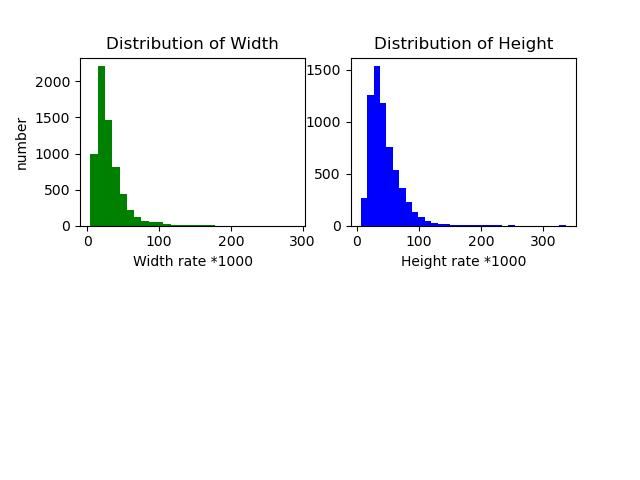

In [7]:
%cd /kaggle/working/PaddleDetection
!python tools/box_distribution.py --json_path dataset/visdrone/train.json --out_img box_distribution.jpg
# 可视化
from PIL import Image
im = Image.open('box_distribution.jpg')
im

/kaggle/working/PaddleDetection
loading annotations into memory...
Done (t=6.28s)
creating index...
index created!
100%|███████████████████████████████| 733891/733891 [00:02<00:00, 353343.92it/s]
Suggested reg_range[1] is 14
Mean of all img_w is 639.9960434234279
Mean of all img_h is 638.756645812211
Median of ratio_w is 0.06171875
Median of ratio_h is 0.06292613636363636
all_img with box:  40439
all_ann:  733891
Distribution saved as box_distribution.jpg


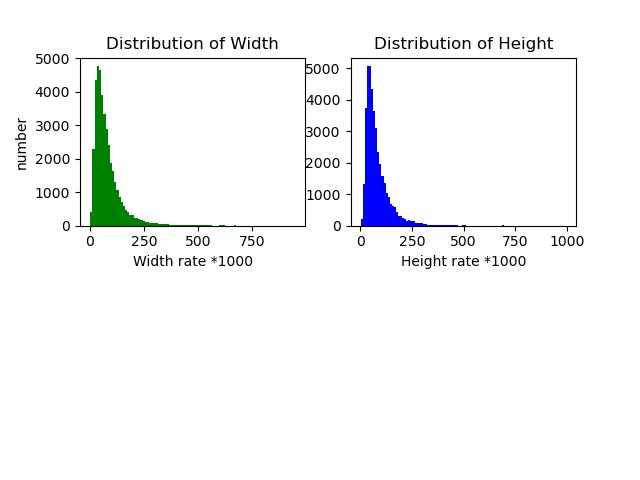

In [8]:
%cd /kaggle/working/PaddleDetection
!python tools/box_distribution.py --json_path /kaggle/working/PaddleDetection/dataset/visdrone_sliced/train_640_025.json --out_img box_distribution.jpg
# 可视化
from PIL import Image
im = Image.open('box_distribution.jpg')
im

# 数据处理

切图操作



```
python tools/slice_image.py --image_dir ./dataset/visdrone/VisDrone2019-DET-val/ --json_path ./dataset/visdrone/val.json --output_dir ./dataset/visdrone_sliced_t --slice_size 640 --overlap_ratio 0.25
```



- --image_dir：原始数据集图片文件夹的路径
- --json_path：原始数据集COCO格式的json标注文件的路径
- --output_dir：切分后的子图及其json标注文件保存的路径
- --slice_size：切分以后子图的边长尺度大小(默认切图后为正方形)
- --overlap_ratio：切分时的子图之间的重叠率

以上述代码为例，切分后的子图文件夹与json标注文件共同保存在visdrone_sliced_t文件夹下，分别命名为val_images_640_025、val_640_025.json

In [9]:
#!pip install sahi
#!python tools/slice_image.py --image_dir visdrone/VisDrone2019-DET-train --json_path visdrone/train.json --output_dir visdrone/VisDrone2019-DET-train-sliced --slice_size 640 --overlap_ratio 0.25
#!python tools/slice_image.py --image_dir visdrone/VisDrone2019-DET-val --json_path visdrone/val.json --output_dir visdrone/VisDrone2019-DET-val-sliced --slice_size 640 --overlap_ratio 0.25
#!python tools/slice_image.py --image_dir visdrone/VisDrone2019-DET-test_dev --json_path visdrone/test_dev.json --output_dir visdrone/VisDrone2019-DET-test_dev-sliced --slice_size 640 --overlap_ratio 0.25

# 模型定义

In [10]:
%cd /kaggle/working/PaddleDetection
model_name = "ppyoloe_crn_l_80e_sliced_visdrone_640_025"
config_path = 'configs/smalldet/' + model_name + '.yml'
eval_weights_path = 'weights=https://paddledet.bj.bcebos.com/models/'+model_name+'.pdparams'

/kaggle/working/PaddleDetection


# 训练

In [15]:
!python tools/train.py -c {config_path} -o LearningRate.base_lr=0.00125 worker_num=1 --eval
#!python -m paddle.distributed.launch --log_dir=logs/  tools/train.py -c configs/smalldet/ppyoloe_crn_l_80e_sliced_visdrone_640_025.yml -o LearningRate.base_lr=0.00125 worker_num=1  --eval


loading annotations into memory...
Done (t=6.64s)
creating index...
index created!
[08/14 05:03:52] ppdet.data.source.coco INFO: Load [40439 samples valid, 3766 samples invalid] in file dataset/visdrone_sliced/train_640_025.json.
W0814 05:03:53.069720   489 gpu_resources.cc:96] The GPU architecture in your current machine is Pascal, which is not compatible with Paddle installation with arch: 70 75 80 86 , it is recommended to install the corresponding wheel package according to the installation information on the official Paddle website.
W0814 05:03:53.069867   489 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 11.8
W0814 05:03:53.072120   489 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.
W0814 05:03:53.072204   489 gpu_resources.cc:175] WARNING: device: 0. The installed Paddle is compiled with CUDA 11.8, but CUDA runtime version in your machine is 11.4, which may cause serious incompatible bug. Please re

# 评估

In [12]:
!python tools/eval.py -c {config_path} -o {eval_weights_path}

W0814 04:58:11.712672   403 gpu_resources.cc:96] The GPU architecture in your current machine is Pascal, which is not compatible with Paddle installation with arch: 70 75 80 86 , it is recommended to install the corresponding wheel package according to the installation information on the official Paddle website.
W0814 04:58:11.712705   403 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 11.8
W0814 04:58:11.714058   403 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.
W0814 04:58:11.714082   403 gpu_resources.cc:175] WARNING: device: 0. The installed Paddle is compiled with CUDA 11.8, but CUDA runtime version in your machine is 11.4, which may cause serious incompatible bug. Please recompile or reinstall Paddle with compatible CUDA version.
loading annotations into memory...
Done (t=1.04s)
creating index...
index created!
[08/14 04:58:14] ppdet.data.source.coco INFO: Load [2777 samples valid, 65 samples invali

# 预测

In [13]:
predict_weights_path = 'weights=https://paddledet.bj.bcebos.com/models/'+model_name+'.pdparams'
!python tools/infer.py -c {config_path} -o {predict_weights_path} --infer_img=demo/visdrone_0000315_01601_d_0000509.jpg --draw_threshold=0.25


W0814 05:03:19.568233   468 gpu_resources.cc:96] The GPU architecture in your current machine is Pascal, which is not compatible with Paddle installation with arch: 70 75 80 86 , it is recommended to install the corresponding wheel package according to the installation information on the official Paddle website.
W0814 05:03:19.568264   468 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 11.8
W0814 05:03:19.569748   468 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.
W0814 05:03:19.569773   468 gpu_resources.cc:175] WARNING: device: 0. The installed Paddle is compiled with CUDA 11.8, but CUDA runtime version in your machine is 11.4, which may cause serious incompatible bug. Please recompile or reinstall Paddle with compatible CUDA version.
[08/14 05:03:23] ppdet.utils.checkpoint INFO: Finish loading model weights: /root/.cache/paddle/weights/ppyoloe_crn_l_80e_sliced_visdrone_640_025.pdparams
loading annotatio

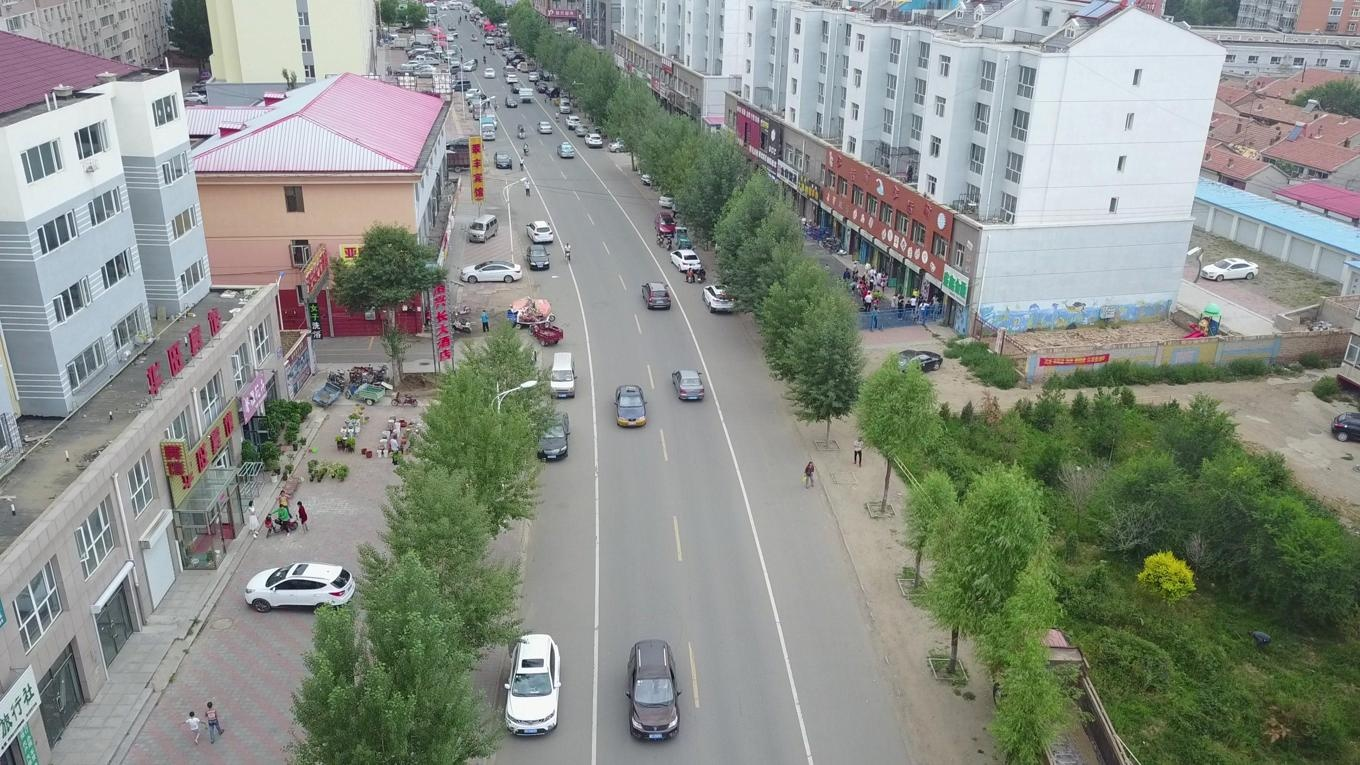

In [14]:
from PIL import Image
im = Image.open('/kaggle/working/PaddleDetection/output/visdrone_0000315_01601_d_0000509.jpg')
im